# Plan:
### We will initially look at our greater data set of all surveyed women from the Chicago Women's Health study that includes the screening  of both women indentified as abused and not abused.  We will use this data to determine the status and probability of any given woman being in a domestically abusive situation.

### This first pipeline to identify the abuse status of a woman will be referred to as "Phase 1" and be done on our first dataframe set that we will refer to as "Dataframe A" or "dfa." 

### "Phase 2" will utilize the subset of women that were identified as abused in the study and compound extra features that were gleaned in a follow-up survey of these identified women.  These features will be narrowed and modeled to identify risk of being reassaulted.  This work can be found in the "Phase 2" Notebook and will investigate appropriately on a compounded dataframe of our original features in addition to the new features from the follow-up survey.

### Hypothesis: From domain knowledge of this field, we predict that there will likely be significant identifiers of abuse that can be fed into a machine-learned model.

# ENVIRONMENT

In [1]:
# basic environment and custom scripts
import os
import acquire
import prepare
import explore
import time

# numpy and pandas for dataframe building and manipulation
import pandas as pd
import numpy as np


# matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
import seaborn as sns

# import preprocessing for scaling and splitting
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# xgboost for feature selection
import xgboost as xgb

# sklearn machine learning
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
# NB:
from sklearn.naive_bayes import GaussianNB
# classification reports
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# SVM
from sklearn.svm import SVC
# Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Dimensionality
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# cross-validation, grid-search
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# visualization for tree model:
import graphviz
from io import StringIO
from IPython.display import Image 
import pydotplus

#  balanced bagging classifier
from imblearn.ensemble import BalancedBaggingClassifier

# to explode the DataFrames and avoid truncation
# pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# ACQUISITION

In [2]:
# utilize acquire script to get primary dataframe for analysis
dfa, dfb = acquire.get_data()

In [3]:
# run info for initial peek at dataframe
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 44 columns):
CASEID      705 non-null int64
ABUSED      705 non-null int64
SCRSTATR    705 non-null int64
LENGTHC1    705 non-null int64
C1SITUAT    705 non-null int64
PABUSE      705 non-null int64
D3RCHILT    705 non-null int64
E13PRGNT    705 non-null int64
N7PREGNT    705 non-null int64
TOTSUPRT    705 non-null int64
G1NUMBER    705 non-null int64
H1JEALUS    705 non-null int64
H2LIMIT     705 non-null int64
H3KNOWNG    705 non-null int64
J1HIT       705 non-null int64
J2THROWN    705 non-null int64
J3PUSH      705 non-null int64
J4SLAP      705 non-null int64
J5KICK      705 non-null int64
J6OBJECT    705 non-null int64
J7BEAT      705 non-null int64
J8CHOKE     705 non-null int64
J9KNIFE     705 non-null int64
J10GUN      705 non-null int64
J11SEX      705 non-null int64
POWER       705 non-null int64
HARASS      705 non-null int64
B1AGE       705 non-null int64
AGEDISP     705 non-null in

## _'dfb' : this is the dataframe with the AW (Abused Woman) cases_

In [4]:
# placeholder cell: perhaps going to utilize these in a later phase

# df9 & 10 are cases of AW (Abused Woman)
df9 = acquire.read_data('data09.csv')
df10 = acquire.read_data('data10.csv')

# df 13, 14 & 15 are cases of HOMICIDE
df13 = acquire.read_data('data13.csv')
df14 = acquire.read_data('data14.csv')
df15 = acquire.read_data('data15.csv')

# PREPARATION

## _Examining the dataframes, dfa & dfb, for any missing or inconsistent values._

In [5]:
dfa.head()

,CASEID,ABUSED,SCRSTATR,LENGTHC1,C1SITUAT,PABUSE,D3RCHILT,E13PRGNT,N7PREGNT,TOTSUPRT,...,N16CHILD,N17ARRST,N1FRQNCY,N2SVRITY,N3WEAPON,N4CHOKE,N5SEX,N6CONTRL,N8JEALUS,N10CPBLE
0,108395,1,1,1,1,1,1,3,2,9,...,2,2,2,2,2,2,2,2,2,2
1,108397,1,1,2,1,1,0,3,3,11,...,2,1,2,1,1,1,1,2,1,1
2,108399,1,1,5,1,1,6,3,2,9,...,2,2,2,2,2,1,2,2,2,2
3,108443,1,1,2,1,1,0,1,2,12,...,2,1,2,2,1,1,2,1,2,2
4,108444,1,1,2,1,1,1,2,2,11,...,2,1,1,1,2,2,2,2,2,2


In [6]:
dfb.head()

,CASEID,M5FIRED,M11HIGH,M35SAFE,M41ILLGL,M42DAGRR,M13TALKR,M32OTHER,M27HOW,M30ARRES,...,FORCEDR,MISCARR,RESTRAIN,CHOKED,NDRUNK,RDRUNK,BOTHDRUN,NDRUGS,RDRUGS,BOTHDRUG
0,108395,9999,2,1,2,0,1,99,99999,3,...,0,0,0,0,0,0,0,0,0,0
1,108397,9999,2,1,2,0,1,99,99999,3,...,0,0,0,1,2,0,0,0,0,0
2,108399,9999,2,1,2,0,1,99,99999,3,...,0,0,1,1,0,0,0,0,0,0
3,108443,9999,2,1,2,0,1,13,99999,3,...,0,0,0,1,1,0,0,0,0,0
4,108444,9999,1,1,2,0,1,99,99999,3,...,0,0,0,0,3,0,0,0,0,0


In [7]:
# formally check that there are no nulls in dataframe
prepare.get_nulls_by_column(dfa)

Empty DataFrame
Columns: [sum_nulls, nulls_by_percent]
Index: []


In [8]:
# check no 2
if not prepare.get_nulls_by_row(dfa):
    print('no nulls!')
else:
    prepare.get_nulls_by_row(dfa)

no nulls!


In [9]:
prepare.summarize_data(dfa)

HEAD
   CASEID  ABUSED  SCRSTATR  LENGTHC1  C1SITUAT  PABUSE  D3RCHILT  E13PRGNT  \
0  108395       1         1         1         1       1         1         3   
1  108397       1         1         2         1       1         0         3   
2  108399       1         1         5         1       1         6         3   
3  108443       1         1         2         1       1         0         1   
4  108444       1         1         2         1       1         1         2   

   N7PREGNT  TOTSUPRT    ...     N16CHILD  N17ARRST  N1FRQNCY  N2SVRITY  \
0         2         9    ...            2         2         2         2   
1         3        11    ...            2         1         2         1   
2         2         9    ...            2         2         2         2   
3         2        12    ...            2         1         2         2   
4         2        11    ...            2         1         1         1   

   N3WEAPON  N4CHOKE  N5SEX  N6CONTRL  N8JEALUS  N10CPBLE  
0        

(17.95, 22.9]    170
(22.9, 27.8]     114
(27.8, 32.7]     117
(32.7, 37.6]     116
(37.6, 42.5]     101
(42.5, 47.4]      44
(47.4, 52.3]      28
(52.3, 57.2]      11
(57.2, 62.1]       2
(62.1, 67.0]       2
Name: B1AGE, dtype: int64

-------------------------------------------------------------

AGEDISP
1      399
2       41
3       17
4      143
5       81
6       15
999      9
Name: AGEDISP, dtype: int64

-------------------------------------------------------------

STDETAI
1      171
2      337
3       14
4        3
5      173
6        2
7        2
999      3
Name: STDETAI, dtype: int64

-------------------------------------------------------------

SAMESEXR
1        19
9999    686
Name: SAMESEXR, dtype: int64

-------------------------------------------------------------

N11DRUGS
1      200
2      480
888     15
999     10
Name: N11DRUGS, dtype: int64

-------------------------------------------------------------

N12ALCHL
1      285
2      409
888      3
999      8
Name: N12A

## We will utilize the first dataframe's Case IDs to group our incident data from set 10 to group by incident and identify surveyed individuals that were victim to more than one instance of abuse

In [10]:
dfa['RECID'] = dfa.CASEID.apply(prepare.get_repeat_case)

## _This new column, RECID, is a boolean value that tells us whether the cases were re-assault cases or not._

In [11]:
# look at unaltered value counts
prepare.value_counts(dfa)

CASEID

-------------------------------------------------------------

ABUSED
1    497
2    208
Name: ABUSED, dtype: int64

-------------------------------------------------------------

SCRSTATR
1      455
2      118
3      115
999     17
Name: SCRSTATR, dtype: int64

-------------------------------------------------------------

LENGTHC1
1    159
2    153
3     83
4    105
5    147
6     58
Name: LENGTHC1, dtype: int64

-------------------------------------------------------------

C1SITUAT
1    395
2     18
3     74
4     10
9    208
Name: C1SITUAT, dtype: int64

-------------------------------------------------------------

PABUSE
1    464
2     27
3      6
9    208
Name: PABUSE, dtype: int64

-------------------------------------------------------------

D3RCHILT
0      339
1      136
2      113
3       57
4       32
5        9
6        9
7        5
12       1
555      1
666      1
999      2
Name: D3RCHILT, dtype: int64

-----------------------------------------------------------

In [109]:
#use prepare function to rename features 
dfa = prepare.rename_columns_all(dfa)
# use prepare function to re-encode data
prepare.replace_nonvals_all(dfa)

In [110]:
prepare.value_counts(dfa)

id

-------------------------------------------------------------

abuse_past_year
0    416
1    497
Name: abuse_past_year, dtype: int64

-------------------------------------------------------------

abuse_status
0    408
1    505
Name: abuse_status, dtype: int64

-------------------------------------------------------------

length_relationship
1    200
2    196
3    109
4    130
5    199
6     79
Name: length_relationship, dtype: int64

-------------------------------------------------------------

partner_abusive
0    508
1    405
Name: partner_abusive, dtype: int64

-------------------------------------------------------------

num_abusers
0    416
1    464
2     33
Name: num_abusers, dtype: int64

-------------------------------------------------------------

num_children
0      430
1      180
2      298
555      1
666      1
999      3
Name: num_children, dtype: int64

-------------------------------------------------------------

pregnant
0    807
1    106
Name: pregnant, dtype

In [13]:
# ensure renaming of features worked
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 45 columns):
id                              705 non-null int64
abuse_past_year                 705 non-null int64
abuse_status                    705 non-null int64
length_relationship             705 non-null int64
partner_abusive                 705 non-null int64
num_abusers                     705 non-null int64
num_children                    705 non-null int64
pregnant                        705 non-null int64
beaten_while_pregnant           705 non-null int64
support_score                   705 non-null int64
guns_in_home                    705 non-null int64
jealous_past_year               705 non-null int64
limit_family_contact            705 non-null int64
location_tracking               705 non-null int64
threat_hit                      705 non-null int64
threat_object                   705 non-null int64
push_shove                      705 non-null int64
slap                        

# This produces padding in the data. Since we have a df with 497 AW and 208 NAW, we want to balance this so that its closer to 497 AW and 500 NAW. So we double the NAW cases.

In [14]:
# select the NAW cases
not_abused = dfa[dfa.abuse_past_year == 0]

In [15]:
not_abused['id'] = range(999999, 999999 + len(not_abused))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
dfa = dfa.append(not_abused)

In [17]:
dfa.columns

Index(['id', 'abuse_past_year', 'abuse_status', 'length_relationship',
       'partner_abusive', 'num_abusers', 'num_children', 'pregnant',
       'beaten_while_pregnant', 'support_score', 'guns_in_home',
       'jealous_past_year', 'limit_family_contact', 'location_tracking',
       'threat_hit', 'threat_object', 'push_shove', 'slap', 'kick_punch',
       'hit_object', 'beaten', 'choked', 'threat_knife', 'threat_gun',
       'rape_with_threat', 'power_scale', 'harass_scale', 'id_age',
       'age_disparity', 'children_not_partner', 'same_sex_relationship',
       'partner_drug_use', 'partner_alcohol_use', 'threat_suicide',
       'partner_reported_child_abuse', 'partner_arrested',
       'violence_increased', 'severity_increased', 'weapon_ever',
       'choked_ever', 'rape_ever', 'controlled_ever', 'jealous',
       'capable_murder', 'reassault'],
      dtype='object')

In [18]:
dfa.shape

(913, 45)

# Now the data is padded with balanced groups of AW and NAW.

In [19]:
# create list of features
features = [col for col in dfa]
# drop features from this list that are perceived as primary key or target variable
features.remove('id')
features.remove('abuse_past_year')
features.remove('abuse_status')

In [20]:
features

['length_relationship',
 'partner_abusive',
 'num_abusers',
 'num_children',
 'pregnant',
 'beaten_while_pregnant',
 'support_score',
 'guns_in_home',
 'jealous_past_year',
 'limit_family_contact',
 'location_tracking',
 'threat_hit',
 'threat_object',
 'push_shove',
 'slap',
 'kick_punch',
 'hit_object',
 'beaten',
 'choked',
 'threat_knife',
 'threat_gun',
 'rape_with_threat',
 'power_scale',
 'harass_scale',
 'id_age',
 'age_disparity',
 'children_not_partner',
 'same_sex_relationship',
 'partner_drug_use',
 'partner_alcohol_use',
 'threat_suicide',
 'partner_reported_child_abuse',
 'partner_arrested',
 'violence_increased',
 'severity_increased',
 'weapon_ever',
 'choked_ever',
 'rape_ever',
 'controlled_ever',
 'jealous',
 'capable_murder',
 'reassault']

In [21]:
# split train and test
X = dfa[features]
y = dfa[['abuse_past_year']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 0, stratify=y)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# EXPLORATION

### We want to eliminate the explicitly violent features (because we are modeling first on predicting abuse or no abuse), so we drop columns from the df and only select features that are not about extremely violent acts/info. Also drop the features that are 'continuous' variables. These are the harass scale, power scale, age id and the age disparity.

In [22]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 704
Data columns (total 45 columns):
id                              913 non-null int64
abuse_past_year                 913 non-null int64
abuse_status                    913 non-null int64
length_relationship             913 non-null int64
partner_abusive                 913 non-null int64
num_abusers                     913 non-null int64
num_children                    913 non-null int64
pregnant                        913 non-null int64
beaten_while_pregnant           913 non-null int64
support_score                   913 non-null int64
guns_in_home                    913 non-null int64
jealous_past_year               913 non-null int64
limit_family_contact            913 non-null int64
location_tracking               913 non-null int64
threat_hit                      913 non-null int64
threat_object                   913 non-null int64
push_shove                      913 non-null int64
slap                        

# Some feature selection before going on to do EDA

### We want to eliminate the violent features, so we drop columns from the df and only select features that are not about extremely violent acts/info. Also drop the features that are 'continuous' variables. These are the harras scale, power scale, age id and the age disparity.

In [23]:
# we will refer to this list of variables as 'keep'
keep = list(dfa.drop(columns={'id','abuse_past_year', 'abuse_status','partner_abusive', 
                              'num_abusers','beaten_while_pregnant','threat_object', 'threat_hit', 
                              'push_shove', 'slap', 'kick_punch', 'hit_object', 'beaten', 'choked', 
                              'threat_knife', 'threat_gun','rape_with_threat','threat_suicide', 
                              'violence_increased', 'severity_increased', 'weapon_ever', 'choked_ever', 
                              'rape_ever','capable_murder'}).columns)
# also remove continuous variables
keep.remove('length_relationship')
keep.remove('id_age')
keep.remove('reassault')

# add the continuous variables into their own list
continuous_vars = ['length_relationship', 'id_age']

## We will run chi-squared tests on our categorical variables in order to get a grasp of importance

In [24]:
# we will run chi-squared tests on our categorical variables in order to get a grasp of importance
sig_feats, sig_dict = explore.get_chi_squared(train_df, keep, 'abuse_past_year')

pregnant
Dependent (reject H0)
-----------------------
support_score
Dependent (reject H0)
-----------------------
jealous_past_year
Dependent (reject H0)
-----------------------
limit_family_contact
Dependent (reject H0)
-----------------------
location_tracking
Dependent (reject H0)
-----------------------
power_scale
Dependent (reject H0)
-----------------------
harass_scale
Dependent (reject H0)
-----------------------
children_not_partner
Dependent (reject H0)
-----------------------
same_sex_relationship
Dependent (reject H0)
-----------------------
partner_drug_use
Dependent (reject H0)
-----------------------
partner_alcohol_use
Dependent (reject H0)
-----------------------
partner_reported_child_abuse
Dependent (reject H0)
-----------------------
partner_arrested
Dependent (reject H0)
-----------------------
controlled_ever
Dependent (reject H0)
-----------------------
jealous
Dependent (reject H0)
-----------------------


# Min/Max Scaling for the continuous variables.

In [25]:
# scale continuous variables
scaler = MinMaxScaler()

scaler.fit(train_df[continuous_vars])

train_df[continuous_vars] = scaler.transform(train_df[continuous_vars])
test_df[continuous_vars] = scaler.transform(test_df[continuous_vars])

In [26]:
continuous_vars

['length_relationship', 'id_age']

In [27]:
sig_feats_c, sig_dict_c = explore.get_significant_t_tests(train_df, continuous_vars)

Feature analyzed: id_age
Comparing abused to non-abused: 
Our t-statistic is -2.827 and the p-value is 0.00481358831
----------


In [28]:
# call function that combines significant features from dictionaries created in statistical tests if both generated results
# otherwise make list of features just from whichever (t test or chi squared) produced significant results
if sig_feats_c and sig_feats:
    features = explore.combine_significants(sig_dict, sig_dict_c)
elif sig_feats_c:
    features = [item[0] for item in explore.sort_sigs(sig_dict_c)]
elif sig_feats:
    features = [item[0] for item in explore.sort_sigs(sig_dict)]

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


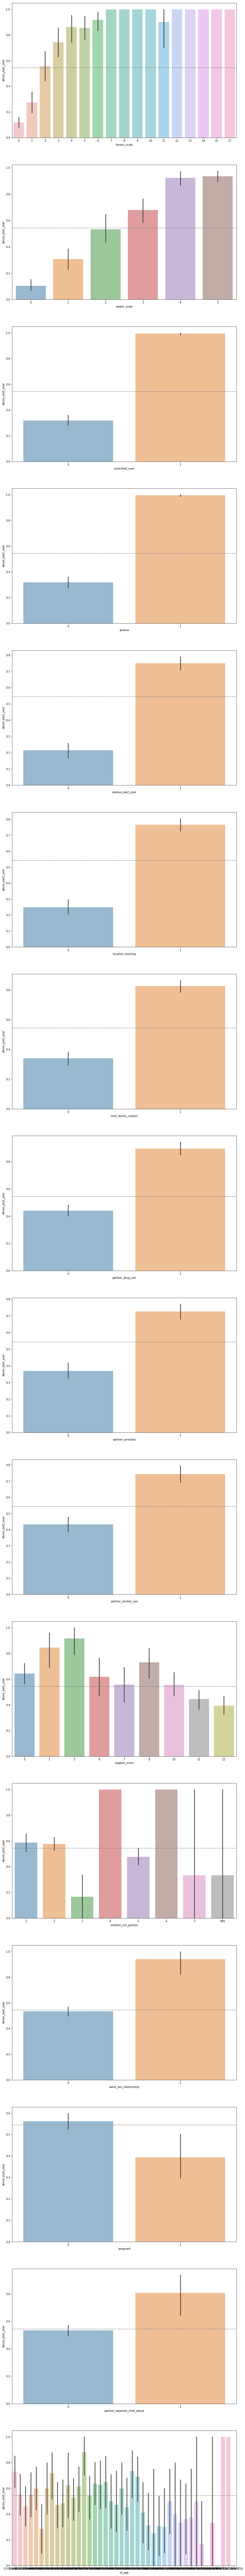

In [29]:
explore.make_bars(train_df, 'abuse_past_year', features)

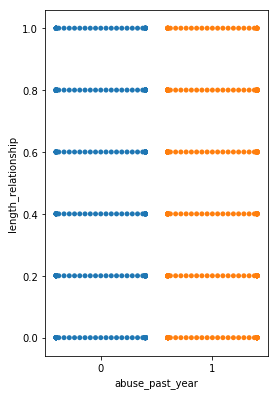

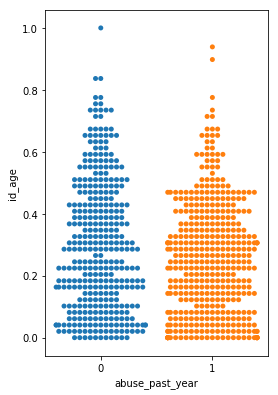

In [30]:
explore.swarrrm(train_df, 'abuse_past_year', continuous_vars)

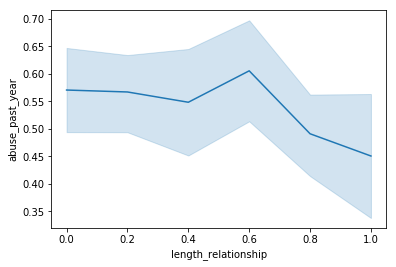

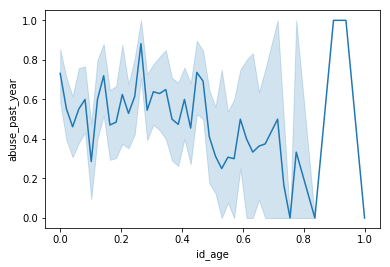

In [31]:
for feature in continuous_vars:
    sns.lineplot(x=feature, y='abuse_past_year', data=train_df)
    plt.show()

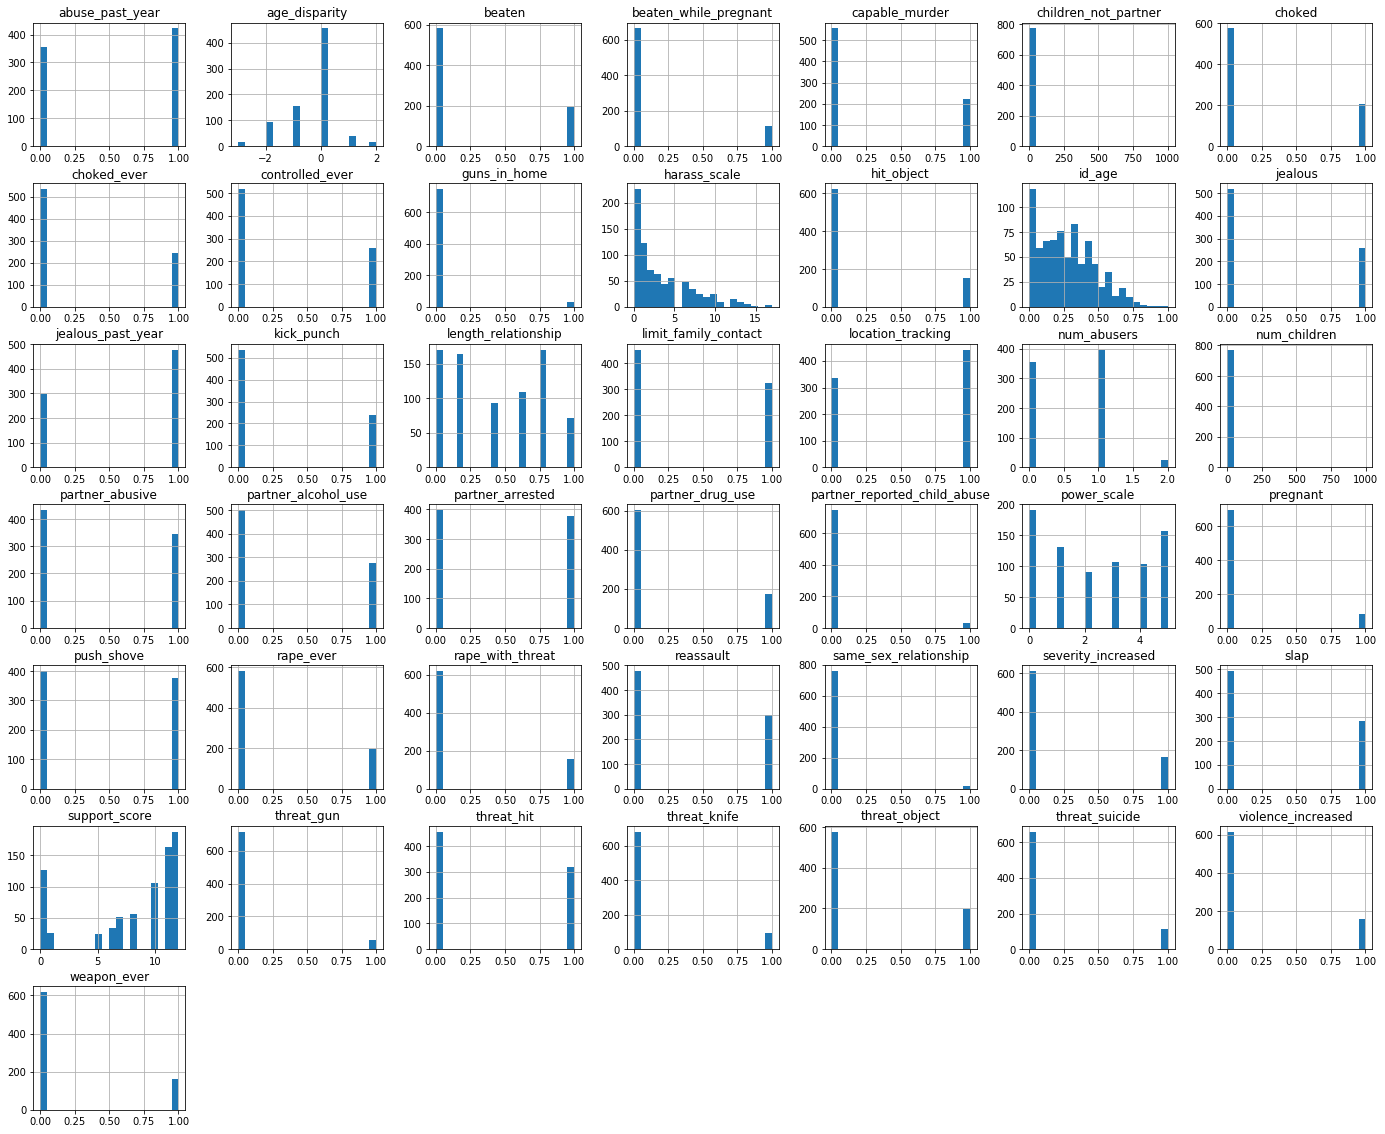

In [32]:
# histograms
# normalization(?)
explore.plot_hist(train_df)

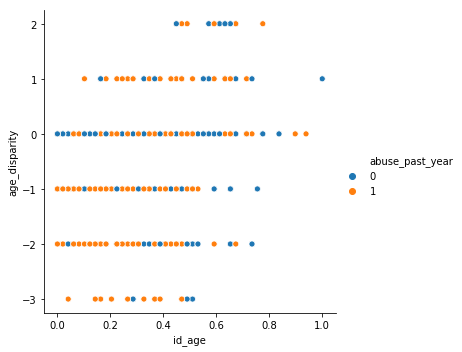

In [33]:
explore.make_rel(train_df, 'id_age', 'age_disparity', hue='abuse_past_year')

# t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [34]:
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123
time_start = time.time()

fashion_tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=250, method='exact')
tsne_results = fashion_tsne.fit_transform(X_train)

print(('t-SNE done! Time elapsed: {} seconds').format(time.time()-time_start))

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 776 / 776
[t-SNE] Mean sigma: 2.829740
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.350390
[t-SNE] Error after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000
t-SNE done! Time elapsed: 8.666092157363892 seconds


In [35]:
# Label to color dict (manual)
label_color_dict = {1:'Abuse',0:'Not Abuse'}

# Color vector creation
cvec = [label_color_dict[label] for label in y_train.abuse_past_year]

# Plot t-sne

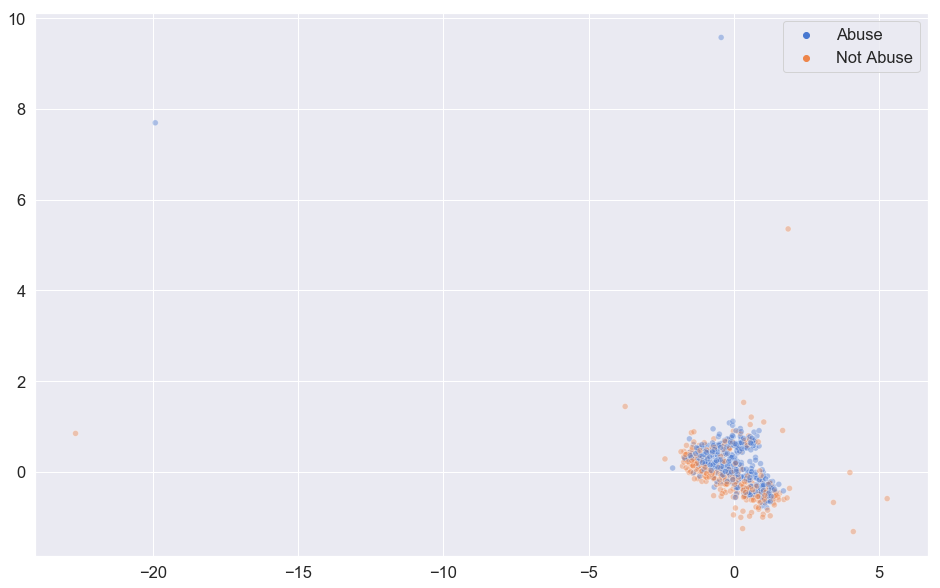

In [36]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=cvec,
    data=X_train,
    legend="full",
    alpha=0.4
)

# Looking closer at the features vs AW/NAW with cross tabs to better summarize the data

In [191]:
## Creates cross tabulation table
pd.crosstab([dfa.pregnant, dfa.beaten_while_pregnant], dfa.abuse_past_year, normalize=True)

abuse_past_year                        0         1
pregnant beaten_while_pregnant                    
0        0                      0.385542  0.371303
         1                      0.000000  0.127054
1        0                      0.070099  0.030668
         1                      0.000000  0.015334

In [164]:
dfa.columns

Index(['id', 'abuse_past_year', 'abuse_status', 'length_relationship',
       'partner_abusive', 'num_abusers', 'num_children', 'pregnant',
       'beaten_while_pregnant', 'support_score', 'guns_in_home',
       'jealous_past_year', 'limit_family_contact', 'location_tracking',
       'threat_hit', 'threat_object', 'push_shove', 'slap', 'kick_punch',
       'hit_object', 'beaten', 'choked', 'threat_knife', 'threat_gun',
       'rape_with_threat', 'power_scale', 'harass_scale', 'id_age',
       'age_disparity', 'children_not_partner', 'same_sex_relationship',
       'partner_drug_use', 'partner_alcohol_use', 'threat_suicide',
       'partner_reported_child_abuse', 'partner_arrested',
       'violence_increased', 'severity_increased', 'weapon_ever',
       'choked_ever', 'rape_ever', 'controlled_ever', 'jealous',
       'capable_murder', 'reassault'],
      dtype='object')

In [173]:
cols_crosstab = list(dfa.drop(columns={'id', 'abuse_past_year', 'abuse_status'}).columns)
# cols_crosstab makes a list of the columns that we can feed into a crosstab 

In [201]:
# Prints crosstabs for all boolean features against the abuse_past_year feature
for i in range(dfa[cols_crosstab].shape[1]):
#     print(dfa.iloc[: , i])
    print(pd.crosstab(dfa[cols_crosstab].iloc[: , i], dfa['abuse_past_year'], margins=True, margins_name='Total',normalize=True))

abuse_past_year             0         1     Total
length_relationship                              
1                    0.089814  0.129244  0.219058
2                    0.094195  0.120482  0.214677
3                    0.056955  0.062432  0.119387
4                    0.054765  0.087623  0.142388
5                    0.113910  0.104053  0.217963
6                    0.046002  0.040526  0.086528
Total                0.455641  0.544359  1.000000
abuse_past_year         0         1     Total
partner_abusive                              
0                0.455641  0.100767  0.556407
1                0.000000  0.443593  0.443593
Total            0.455641  0.544359  1.000000
abuse_past_year         0         1     Total
num_abusers                                  
0                0.455641  0.000000  0.455641
1                0.000000  0.508215  0.508215
2                0.000000  0.036145  0.036145
Total            0.455641  0.544359  1.000000
abuse_past_year         0         1     Tota

abuse_past_year             0         1     Total
partner_alcohol_use                              
0                    0.365827  0.277108  0.642935
1                    0.089814  0.267251  0.357065
Total                0.455641  0.544359  1.000000
abuse_past_year         0         1     Total
threat_suicide                               
0                0.440307  0.410734  0.851041
1                0.015334  0.133625  0.148959
Total            0.455641  0.544359  1.000000
abuse_past_year                      0         1     Total
partner_reported_child_abuse                              
0                             0.449069  0.514786  0.963855
1                             0.006572  0.029573  0.036145
Total                         0.455641  0.544359  1.000000
abuse_past_year          0         1     Total
partner_arrested                              
0                 0.322015  0.200438  0.522453
1                 0.133625  0.343921  0.477547
Total             0.455641  0.544359 

In [202]:
## Creates cross tabulation table
pd.crosstab([dfa.same_sex_relationship, dfa.reassault], dfa.abuse_past_year, normalize=True)

abuse_past_year                         0         1
same_sex_relationship reassault                    
0                     0          0.453450  0.154436
                      1          0.000000  0.370208
1                     0          0.002191  0.006572
                      1          0.000000  0.013143

# Joint Plots

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


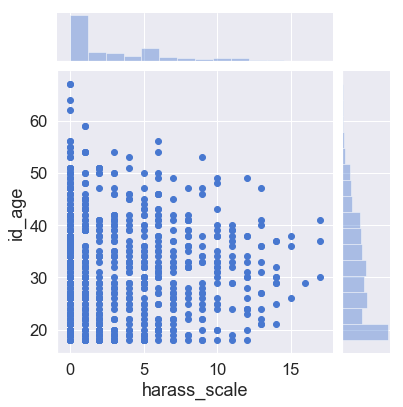

In [248]:
sns.jointplot(data=dfa, x='harass_scale', y='id_age')

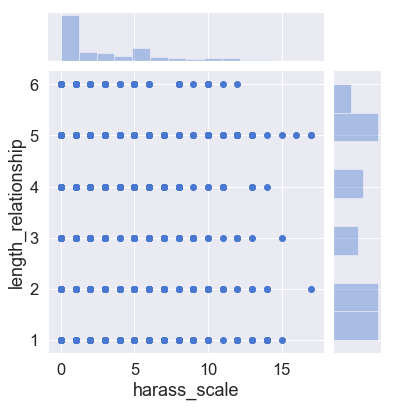

In [256]:
sns.jointplot(data=dfa, x='harass_scale', y='length_relationship')

# Scatter Plots

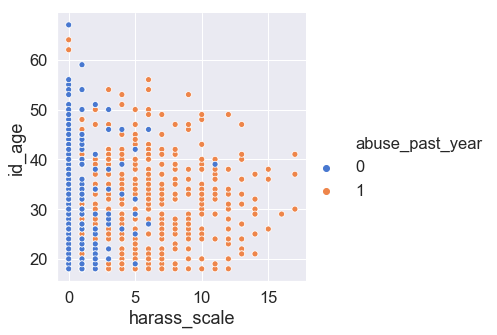

In [249]:
sns.relplot(data=dfa, x='harass_scale', y='id_age', hue='abuse_past_year')

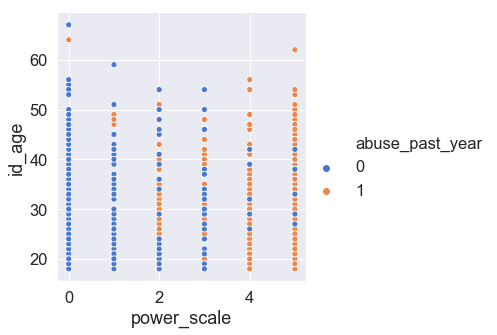

In [254]:
sns.relplot(data=dfa, x='power_scale', y='id_age', hue='abuse_past_year')

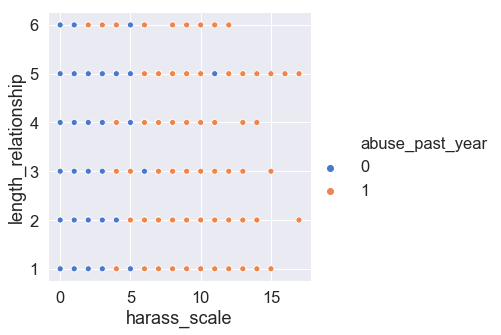

In [255]:
sns.relplot(data=dfa, x='harass_scale', y='length_relationship', hue='abuse_past_year')

# Bokeh Plots
### See for more information: https://programminghistorian.org/en/lessons/visualizing-with-bokeh#what-is-bokeh

In [265]:
# Jitter plot
# # Import the necessary modules
# from bokeh.plotting import figure, output_file, show, output_notebook
# from bokeh.models import ColumnDataSource
# from bokeh.io import show, output_file
# from bokeh.transform import jitter

# # Construct the interactive tools
# TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

# # Format the data for the bokeh plot to use
# source = ColumnDataSource(dfa)

# # establish a y value for the not abused and then a y value for the abused
# y_range=dfa.power_scale

# # Construct the figure
# p = figure(plot_width=800, plot_height=300, y_range=['Under 20', 'Between 21-30', 'Over 30'], x_axis_type='linear',
#            title="Harass Scale with Abused and Not Abused Women")

# # p = Scatter(dfa, x='abuse_last_year', y='id_age', color="reassault", title="Abuse vs Age and Reassault",
# #             xlabel="Abuse", ylabel="Age")

# p.circle(x='harass_scale', y=jitter('power_scale', width=0.6, range=p.y_range),  source=dfa, alpha=0.3, fill_color='abuse_past_year')

# # add a circle renderer with vectorized colors and sizes
# # p.circle(dfa.abuse_past_year, dfa.id_age, fill_color='navy', fill_alpha=0.6, line_color=None)

# # show the results
# show(p)

# # Create axis titles
# p.xaxis.axis_label = 'Harass Scale'
# p.yaxis.axis_label = 'Power Scale'


# # Output the file 
# # output_file('abusevsnotabuse.html')

In [263]:
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

from bokeh.palettes import Spectral5
from bokeh.transform import factor_cmap

In [294]:
grouped = dfa.groupby('abuse_past_year')['id_age', 'harass_scale', 'power_scale', 'length_relationship'].mean()
grouped

,id_age,harass_scale,power_scale,length_relationship
abuse_past_year,,,,
0,32.543269,0.875000,1.024038,3.322115
1,30.722334,5.472837,3.448692,3.070423


In [302]:
grouped.rename(index = {0: "not_abused", 
                     1:"abused"}, inplace = True) 

In [311]:
grouped

,id_age,harass_scale,power_scale,length_relationship
abuse_past_year,,,,
not_abused,32.543269,0.875000,1.024038,3.322115
abused,30.722334,5.472837,3.448692,3.070423


In [312]:
dfa.groupby(['abuse_past_year', 'same_sex_relationship'])['id_age', 'harass_scale', 'power_scale', 'length_relationship'].mean()

id_age  harass_scale  power_scale  \
abuse_past_year same_sex_relationship                                         
0               0                      32.478261      0.859903     1.014493   
                1                      46.000000      4.000000     3.000000   
1               0                      30.728601      5.436326     3.436326   
                1                      30.555556      6.444444     3.777778   

                                       length_relationship  
abuse_past_year same_sex_relationship                       
0               0                                 3.328502  
                1                                 2.000000  
1               0                                 3.098121  
                1                                 2.333333

In [313]:
# Colored bar chart
output_file('harass.html')

# establish the categories to plot
source = ColumnDataSource(grouped)

In [314]:
abuse_stat = list(np.unique(source.data['abuse_past_year']))
p = figure(x_range=abuse_stat)

In [315]:
abuse_stat

['abused', 'not_abused']

In [319]:
color_map = factor_cmap(field_name='abuse_past_year',
                    palette=Spectral5, factors=abuse_stat)
p.vbar(x='abuse_past_year', top='id_age', source=source, width=0.70, color=color_map)
p.title.text ='Average Age by Abuse Status'
p.xaxis.axis_label = 'Abused or Not Abused'
p.yaxis.axis_label = 'Average Age'

# adds the hover tool
hover = HoverTool()
hover.tooltips = [
    ("Averages", "@harass_scale Harass Scale / @power_scale Power Scale / @length_relationship Length of Relationship")]

hover.mode = 'vline'

p.add_tools(hover)

show(p)

In [317]:
output_notebook()

Loading BokehJS ...

In [238]:
dfa.columns

Index(['id', 'abuse_past_year', 'abuse_status', 'length_relationship',
       'partner_abusive', 'num_abusers', 'num_children', 'pregnant',
       'beaten_while_pregnant', 'support_score', 'guns_in_home',
       'jealous_past_year', 'limit_family_contact', 'location_tracking',
       'threat_hit', 'threat_object', 'push_shove', 'slap', 'kick_punch',
       'hit_object', 'beaten', 'choked', 'threat_knife', 'threat_gun',
       'rape_with_threat', 'power_scale', 'harass_scale', 'id_age',
       'age_disparity', 'children_not_partner', 'same_sex_relationship',
       'partner_drug_use', 'partner_alcohol_use', 'threat_suicide',
       'partner_reported_child_abuse', 'partner_arrested',
       'violence_increased', 'severity_increased', 'weapon_ever',
       'choked_ever', 'rape_ever', 'controlled_ever', 'jealous',
       'capable_murder', 'reassault'],
      dtype='object')

# ~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-

# Modeling:

### We will attempt several different tactics and models as a means to find the best fit for our data set.  We will try with various features and par down with what we found as being statistically significant through chi-squared testing.

# Naive Bayes

In [37]:
# create the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train[keep], y_train)
# make predictions with the model
y_pred = gnb.predict(X_train[keep])
# predict probability with the model
y_pred_proba = gnb.predict_proba(X_train[keep])

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train[keep], y_train)))

Accuracy of GNB classifier on training set: 0.86


In [39]:
# print raw confusion matrix:
# ~~~~~ edit this to display cleaner ~~~~~
print(confusion_matrix(y_train, y_pred))

[[332  22]
 [ 83 339]]


In [40]:
# classification report
print(classification_report(y_train, y_pred))


             precision    recall  f1-score   support

          0       0.80      0.94      0.86       354
          1       0.94      0.80      0.87       422

avg / total       0.88      0.86      0.86       776



# This Gaussian Naive Bayes Model performed at 86% recall with the following features:

In [41]:
keep

['num_children',
 'pregnant',
 'support_score',
 'guns_in_home',
 'jealous_past_year',
 'limit_family_contact',
 'location_tracking',
 'power_scale',
 'harass_scale',
 'age_disparity',
 'children_not_partner',
 'same_sex_relationship',
 'partner_drug_use',
 'partner_alcohol_use',
 'partner_reported_child_abuse',
 'partner_arrested',
 'controlled_ever',
 'jealous']

## Try another GNB model with a lot fewer features. These are the top 5 features of significance according to the chi squared testing.

In [42]:
features[0:5]

['harass_scale',
 'power_scale',
 'controlled_ever',
 'jealous',
 'jealous_past_year']

In [43]:
top5 = features[0:5]
top5_non_agg = ['jealous',
                'controlled_ever', 
                'location_tracking',
                'limit_family_contact', 
                'partner_arrested']

In [44]:
gnb = GaussianNB()
gnb.fit(X_train[top5_non_agg], y_train)

y_pred = gnb.predict(X_train[top5_non_agg])

y_pred_proba = gnb.predict_proba(X_train[top5_non_agg])

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train[top5_non_agg], y_train)))

print(confusion_matrix(y_train, y_pred))


print(classification_report(y_train, y_pred))

Accuracy of GNB classifier on training set: 0.86
[[353   1]
 [109 313]]
             precision    recall  f1-score   support

          0       0.76      1.00      0.87       354
          1       1.00      0.74      0.85       422

avg / total       0.89      0.86      0.86       776



# The GNB model performs better with the top 5 features. It has recall of 86%.

## Logistic Regression w/ Cross Validation: 

In [46]:
clf = LogisticRegressionCV(cv=5,
                           random_state=0,
                          ).fit(X_train[features], y_train)

y_pred = clf.predict(X_train[features])

y_pred_proba = clf.predict_proba(X_train[features])

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
clf.score(X_train[features], y_train) 

0.8814432989690721

In [48]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(clf.score(X_train[features], y_train)))

Accuracy of Logistic Regression classifier on training set: 0.88


In [49]:
print(confusion_matrix(y_train, y_pred))

[[335  19]
 [ 73 349]]


In [50]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.95      0.88       354
          1       0.95      0.83      0.88       422

avg / total       0.89      0.88      0.88       776



# Logistic Regression model performs at 88% recall.

# Decision Tree:

In [51]:
params = {'max_depth': [2, 3, 4],
          'max_features': [None, 1, 3]}

In [52]:
# for classificaiton you can change the algorithm as gini or entropy (information gain).  Default is gini.
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=3, random_state=0)

In [53]:
grid = GridSearchCV(dtc, params, cv=3, iid=True)

In [54]:
grid.fit(X_train[features], y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4], 'max_features': [None, 1, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
results = grid.cv_results_
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [56]:
test_scores = results['mean_test_score']
test_scores

array([0.8556701 , 0.76030928, 0.78350515, 0.85438144, 0.79639175,
       0.81314433, 0.86984536, 0.83376289, 0.79123711])

In [57]:
params = results['params']
params

[{'max_depth': 2, 'max_features': None},
 {'max_depth': 2, 'max_features': 1},
 {'max_depth': 2, 'max_features': 3},
 {'max_depth': 3, 'max_features': None},
 {'max_depth': 3, 'max_features': 1},
 {'max_depth': 3, 'max_features': 3},
 {'max_depth': 4, 'max_features': None},
 {'max_depth': 4, 'max_features': 1},
 {'max_depth': 4, 'max_features': 3}]

In [58]:
for p, s in zip(params, test_scores):
    p['score'] = s

pd.DataFrame(params).sort_values(by='score')

,max_depth,max_features,score
1,2,1.0,0.760309
2,2,3.0,0.783505
8,4,3.0,0.791237
4,3,1.0,0.796392
5,3,3.0,0.813144
7,4,1.0,0.833763
3,3,NaN,0.854381
0,2,NaN,0.855670
6,4,NaN,0.869845


In [59]:
dtc.fit(X_train[features], y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [60]:
cross_val_score(dtc, X_train[features], y_train, cv=5)

array([0.81410256, 0.80128205, 0.8       , 0.79354839, 0.85064935])

In [61]:
y_pred = dtc.predict(X_train[features])
y_pred[0:5]

array([1, 1, 0, 1, 0])

In [62]:
y_pred_proba = dtc.predict_proba(X_train[features])
y_pred_proba

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.66      , 0.34      ],
       ...,
       [0.        , 1.        ],
       [0.73684211, 0.26315789],
       [0.66      , 0.34      ]])

In [63]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train[features], y_train)))

Accuracy of Decision Tree classifier on training set: 0.84


In [64]:
confusion_matrix(y_train, y_pred)

array([[334,  20],
       [104, 318]])

In [65]:
sorted(y_train.abuse_past_year.unique())

[0, 1]

In [66]:
y_train.abuse_past_year.value_counts()

1    422
0    354
Name: abuse_past_year, dtype: int64

In [67]:
labels = sorted(y_train.abuse_past_year.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,334,20
1,104,318


In [68]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.76      0.94      0.84       354
          1       0.94      0.75      0.84       422

avg / total       0.86      0.84      0.84       776



# The Grid Search decision tree performs at 84% recall.

In [69]:
params = {'max_depth': [2, 3, 4],
          'max_features': [None, 1, 3]}

In [70]:
# for classificaiton you can change the algorithm as gini or entropy (information gain).  Default is gini.
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=3, random_state=0)

In [71]:
grid = GridSearchCV(dtc, params, cv=3, iid=True)

In [72]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4], 'max_features': [None, 1, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
results = grid.cv_results_
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [74]:
test_scores = results['mean_test_score']
test_scores

array([1.        , 0.59278351, 0.82087629, 1.        , 0.64819588,
       0.88659794, 1.        , 0.7306701 , 0.8878866 ])

In [75]:
params = results['params']
params

[{'max_depth': 2, 'max_features': None},
 {'max_depth': 2, 'max_features': 1},
 {'max_depth': 2, 'max_features': 3},
 {'max_depth': 3, 'max_features': None},
 {'max_depth': 3, 'max_features': 1},
 {'max_depth': 3, 'max_features': 3},
 {'max_depth': 4, 'max_features': None},
 {'max_depth': 4, 'max_features': 1},
 {'max_depth': 4, 'max_features': 3}]

In [76]:
for p, s in zip(params, test_scores):
    p['score'] = s

pd.DataFrame(params).sort_values(by='score')

,max_depth,max_features,score
1,2,1.0,0.592784
4,3,1.0,0.648196
7,4,1.0,0.730670
2,2,3.0,0.820876
5,3,3.0,0.886598
8,4,3.0,0.887887
0,2,NaN,1.000000
3,3,NaN,1.000000
6,4,NaN,1.000000


In [77]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [78]:
cross_val_score(dtc, X_train, y_train, cv=5)

array([0.91025641, 0.91025641, 0.90322581, 0.86451613, 0.9025974 ])

In [79]:
y_pred = dtc.predict(X_train)
y_pred[0:5]

array([1, 1, 1, 0, 0])

In [80]:
y_pred_proba = dtc.predict_proba(X_train)
y_pred_proba

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.40322581, 0.59677419],
       ...,
       [0.        , 1.        ],
       [0.8583815 , 0.1416185 ],
       [0.40322581, 0.59677419]])

In [81]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.90


In [82]:
confusion_matrix(y_train, y_pred)

array([[328,  26],
       [ 53, 369]])

In [83]:
sorted(y_train.abuse_past_year.unique())

[0, 1]

In [84]:
y_train.abuse_past_year.value_counts()

1    422
0    354
Name: abuse_past_year, dtype: int64

In [85]:
labels = sorted(y_train.abuse_past_year.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,328,26
1,53,369


In [86]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.93      0.89       354
          1       0.93      0.87      0.90       422

avg / total       0.90      0.90      0.90       776



# The decision tree classifier performs at 90%.

In [87]:
import graphviz
from io import StringIO
from IPython.display import Image 
import pydotplus
from sklearn import preprocessing
from sklearn import tree

In [88]:
# conda install pydotplus
def plot_decision_tree(clf,feature_name,target_name):
    '''This function creates a visualization of a decision tree in png format. 
    Takes a decision tree object, feature names of the training set and a target variable for the target name.'''
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

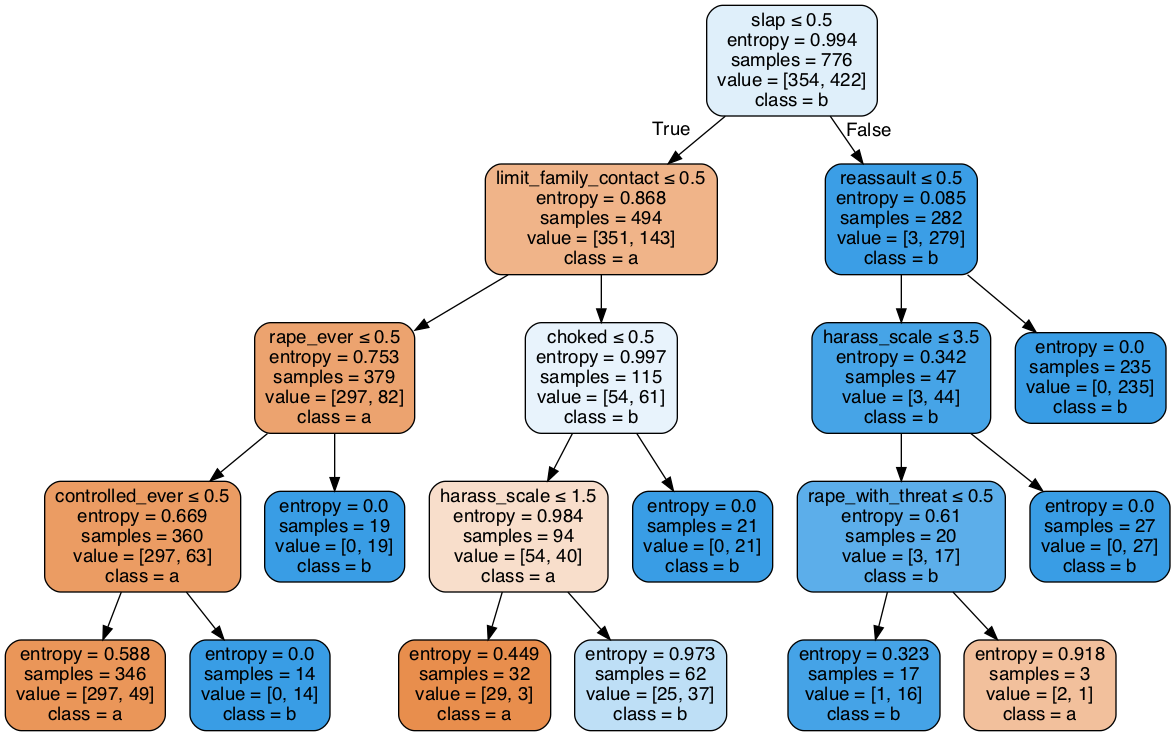

In [89]:
plot_decision_tree(dtc, X_train.columns, dfa.columns[1])

##  Random Forest:

In [90]:
r_params = {'max_depth': [2, 3, 4]}

In [91]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='entropy',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=0)

In [92]:
r_grid = GridSearchCV(rf, r_params, cv=3, iid=True)

In [93]:
r_grid.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarni

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [94]:
r_results = r_grid.cv_results_
r_results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [95]:
r_test_scores = r_results['mean_test_score']
r_test_scores

array([1.        , 0.99871134, 0.99871134])

In [96]:
r_params = r_results['params']
r_params

[{'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}]

In [97]:
for p, s in zip(r_params, r_test_scores):
    p['score'] = s

pd.DataFrame(r_params).sort_values(by='score')

,max_depth,score
1,3,0.998711
2,4,0.998711
0,2,1.000000


In [98]:
rf.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [99]:
cross_val_score(rf, X_train, y_train, cv=5)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarni

array([1.        , 0.99358974, 0.98709677, 0.99354839, 1.        ])

In [100]:
print(rf.feature_importances_)

[3.98415209e-04 1.59191436e-01 2.43329726e-01 1.66933806e-04
 0.00000000e+00 7.84998994e-04 1.85674368e-04 0.00000000e+00
 2.48585798e-04 1.38842064e-04 3.59730877e-03 8.58109500e-02
 8.44062996e-03 1.13384697e-01 5.70084613e-02 1.89014878e-02
 2.19623334e-03 6.42562203e-03 7.92097436e-03 0.00000000e+00
 4.31310361e-04 2.17983742e-03 1.37711492e-02 3.70968095e-02
 9.71452338e-04 8.29533374e-05 5.86527137e-04 0.00000000e+00
 1.37273936e-03 0.00000000e+00 3.56980685e-05 1.27163474e-04
 3.51281521e-04 2.82623956e-03 2.72637031e-03 2.91700923e-03
 2.06108057e-02 4.20338054e-03 4.24317568e-02 5.18497614e-02
 1.37400373e-02 9.35567409e-02]


In [101]:
y_pred = rf.predict(X_train)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,

In [102]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.08164369, 0.91835631],
       [0.00303123, 0.99696877],
       [0.19699029, 0.80300971],
       ...,
       [0.04642111, 0.95357889],
       [0.91530632, 0.08469368],
       [0.89784277, 0.10215723]])

In [103]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 1.00


In [104]:
print(confusion_matrix(y_train, y_pred))

[[353   1]
 [  0 422]]


In [105]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       354
          1       1.00      1.00      1.00       422

avg / total       1.00      1.00      1.00       776



# Random Forest performs at 100%. Uh-oh.